Open the dataset ames_housing_no_missing.csv with the following command:

In [1]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

The column "SalePrice" contains the target variable.

To simplify this exercise, we will only used the numerical features defined below:

In [2]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

Start by fitting a ridge regressor (sklearn.linear_model.Ridge) fixing the penalty alpha to 0 to not regularize the model. Use a 10-fold cross-validation and pass the argument return_estimator=True in sklearn.model_selection.cross_validate to access all fitted estimators fitted on each fold. As discussed in the previous notebooks, use an instance of sklearn.preprocessing.StandardScaler to scale the data before passing it to the regressor.

In [3]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=0))

cv_results = cross_validate(ridge_model,
                            data_numerical, target, 
                            return_estimator=True, cv=10)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.14082e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48388e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.80818e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.08256e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

In [4]:
import pandas as pd

coefs = [est[-1].coef_ for est in cv_results['estimator']]
weights_linear_regression = pd.DataFrame(coefs, columns=numerical_features)

In [5]:
weights_linear_regression

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-477.202832,1395.540100,7655.691447,3.989127e+03,-1.992954e+03,-1.739406e+03,1.661152e+04,4.022795e+04,4.569025e+04,2.136378e+03,...,3328.216903,20941.942915,-1944.135578,4545.080575,2191.017662,-2101.289606,1697.503301,1686.152481,-2026.509271,380.541091
1,-1016.213312,1150.767309,6617.839827,-3.171104e+03,-4.085297e+03,-8.132379e+03,2.324843e+04,-2.986497e+04,-3.273497e+04,-6.986904e+03,...,3215.048876,20405.116248,-2403.931759,5397.506662,1696.853322,-3121.218834,882.798279,741.586137,-1788.269720,299.330339
2,-150.825295,493.494153,6840.114320,6.882612e+03,-1.227001e+03,1.661015e+03,1.342804e+04,-1.627515e+04,-1.659337e+04,-4.949754e+03,...,3325.567712,19834.179972,-1301.615555,5531.217512,1807.927245,-2641.401649,1067.918877,1957.465630,-1763.152344,-1049.227055
3,-233.286402,1969.174794,7820.072329,5.660208e+04,1.650725e+04,4.979373e+04,-3.500391e+04,-2.652812e+04,-3.110900e+04,-6.958026e+03,...,2126.014179,20244.305568,-2026.581440,4444.633484,3026.662545,-2750.335505,827.338760,1598.075553,-2181.137774,305.569835
4,443.696101,1379.978172,6142.604122,1.019803e+05,3.435266e+04,9.579910e+04,-8.039378e+04,1.539052e+04,1.905071e+04,-1.075680e+03,...,3623.766859,19635.247044,251.095203,3936.299077,1970.001895,-2465.491354,981.516716,1961.542547,-1611.636363,-5.286313
5,338.901467,1280.384826,6201.521783,-2.129371e+04,-1.054632e+04,-2.603782e+04,3.982578e+04,-1.105377e+05,-1.222657e+05,-1.718697e+04,...,3396.092371,22653.808099,-3280.817225,4834.117376,2110.792946,-2524.967666,1050.705702,1378.636069,-2246.749756,276.031546
6,-489.686807,1809.001442,6961.903065,1.222984e+04,1.796644e+03,7.557907e+03,8.254597e+03,1.443095e+04,1.917895e+04,-7.496963e+02,...,3047.884170,20200.369067,-1026.464797,5790.611069,2540.198153,-2576.572229,1549.167262,1959.662342,-1808.455332,253.931843
7,-2150.565785,1179.144138,7247.163318,-4.969873e+18,-1.770471e+18,-4.778107e+18,4.771449e+18,-1.204271e+19,-1.361257e+19,-1.550650e+18,...,2942.324228,23276.774437,-9192.390861,4180.131034,3128.998021,-6812.089922,-686.497923,1757.165163,-5327.185780,3164.376581
8,2684.949822,2128.420676,4637.694639,9.343513e+17,3.500847e+17,9.577108e+17,-9.017686e+17,2.609555e+18,3.011876e+18,3.446615e+17,...,2318.673681,13060.388106,3949.302538,3292.210973,3061.088888,-2626.633909,-104.499554,653.470970,567.966515,844.744780
9,-399.394435,1984.176629,9086.583571,4.551274e+18,1.575327e+18,4.355752e+18,-4.361649e+18,2.051421e+18,2.316445e+18,2.640915e+17,...,4069.517486,17817.311554,1791.731475,4503.067725,632.900594,-1818.336174,765.970731,2871.698171,-1897.465073,296.213899


In [6]:
weights_linear_regression.describe().loc[['min', 'max']]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-2150.565785,493.494153,4637.694639,-4.969873e+18,-1.770471e+18,-4.778107e+18,-4.361649e+18,-1.204271e+19,-1.361257e+19,-1.550650e+18,...,2126.014179,13060.388106,-9192.390861,3292.210973,632.900594,-6812.089922,-686.497923,653.470970,-5327.185780,-1049.227055
max,2684.949822,2128.420676,9086.583571,4.551274e+18,1.575327e+18,4.355752e+18,4.771449e+18,2.609555e+18,3.011876e+18,3.446615e+17,...,4069.517486,23276.774437,3949.302538,5790.611069,3128.998021,-1818.336174,1697.503301,2871.698171,567.966515,3164.376581


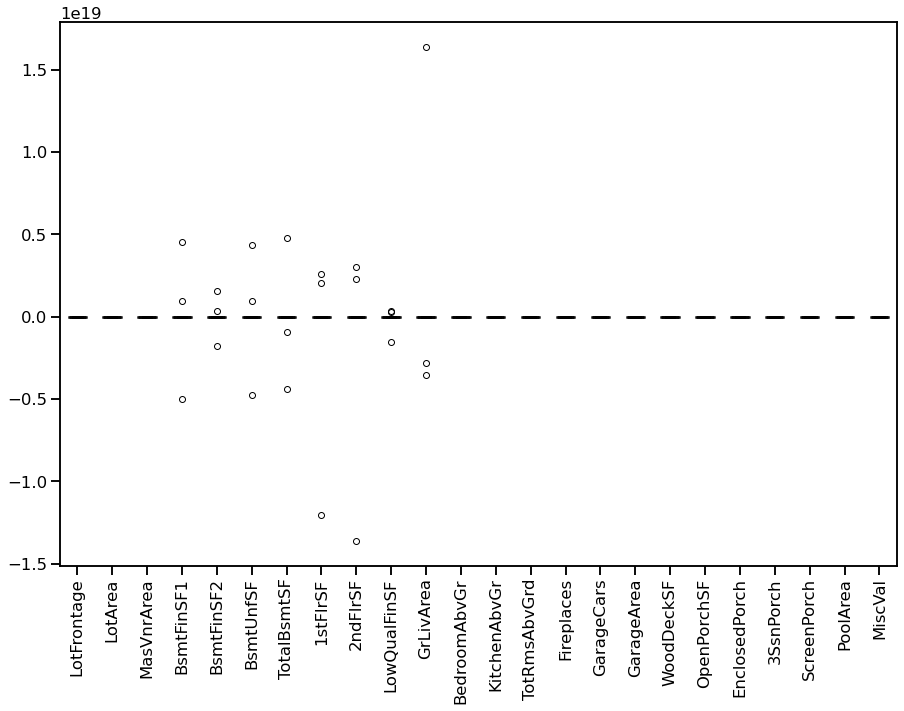

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
# Define the style of the box style
boxplot_property = {
    'vert': True,
    'whis': 100,
    'patch_artist': True,
    'widths': 0.5,
    'rot': 90,
    'boxprops': dict(linewidth=3, color='black', alpha=0.9),
    'medianprops': dict(linewidth=2.5, color='black', alpha=0.9),
    'whiskerprops': dict(linewidth=3, color='black', alpha=0.9),
    'capprops': dict(linewidth=3, color='black', alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = weights_linear_regression.plot.box(**boxplot_property, ax=ax)

Repeat the same experiment by fitting a ridge regressor (sklearn.linear_model.Ridge) with the default parameter (i.e. alpha=1.0).

In [8]:
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1))

cv_results = cross_validate(ridge_model,
                            data_numerical, target, 
                            return_estimator=True, cv=10)

In [9]:
coefs = [est[-1].coef_ for est in cv_results['estimator']]
weights_linear_regression = pd.DataFrame(coefs, columns=numerical_features)

In [10]:
weights_linear_regression

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-476.754038,1395.265868,7657.727958,8808.084233,-269.703768,2933.250315,11936.833677,10101.976360,11966.640153,-1560.403619,...,3343.709544,20867.286383,-1862.727463,4547.287091,2195.085772,-2102.823437,1697.856940,1685.347396,-2024.619474,378.544940
1,-1014.941352,1150.580724,6620.700545,8565.024170,-70.053229,3087.955340,11956.500135,9935.653200,11841.466887,-2770.569902,...,3230.651161,20329.015172,-2320.141348,5400.151749,1700.736001,-3120.965207,883.477224,740.771764,-1786.461511,297.451367
2,-150.876387,493.591270,6843.024664,8498.092288,-658.039034,3238.457525,11859.105753,9363.204570,11954.290467,-1691.339324,...,3340.471569,19764.507913,-1225.551540,5533.832881,1812.416635,-2642.142579,1068.534756,1956.118214,-1761.652154,-1050.602603
3,-233.390058,1968.789237,7822.622938,7967.955293,-561.667200,2709.316503,10989.135615,11243.005735,12777.655159,-1825.118416,...,2145.052452,20169.592626,-1943.885464,4447.825185,3030.459490,-2750.448784,828.462773,1596.273553,-2178.364964,303.711725
4,442.991887,1381.008329,6145.027307,7862.001820,218.607366,3240.788725,11407.896232,8664.061930,11417.665779,-1910.699121,...,3636.999322,19571.095410,320.408726,3938.958046,1973.950344,-2466.365099,982.238617,1960.759128,-1610.267541,-6.210630
5,337.586500,1280.302144,6204.965602,8604.518987,-168.769685,2228.213769,11083.678123,10854.619591,12301.406783,-1488.188974,...,3413.367678,22562.769198,-3183.723296,4835.891524,2113.457778,-2526.139845,1051.314980,1376.681166,-2244.483092,274.093027
6,-490.130594,1808.916632,6963.780573,8122.074016,358.820285,3629.729164,12190.068143,8744.488333,12782.039014,-1439.212728,...,3062.024439,20127.655974,-946.622962,5791.918839,2543.733411,-2578.047570,1548.591961,1958.297563,-1806.929258,252.541283
7,-627.947825,1325.538815,6956.567906,8081.283989,-413.641028,2405.945256,10673.168368,10824.482553,11239.374795,-1280.035931,...,3758.486675,20032.645971,-639.301222,5400.543988,2065.721831,-3391.962390,1050.305327,1611.829741,-1884.893780,313.419320
8,2813.950135,2601.096893,6467.069111,11098.319437,-619.709950,4175.634363,15693.414764,7710.687901,13642.435186,-1735.103867,...,2269.276106,11610.344076,4626.005696,3287.994032,2027.444655,-3110.866623,32.953000,1282.296379,71.092558,607.322413
9,19.595844,1675.831347,6945.154935,8134.095079,198.754703,3133.306199,11688.584625,9576.941376,12096.912771,-1482.866295,...,2670.548528,19144.189169,-80.015915,4446.456303,1493.838234,-2663.425470,293.709642,2172.624444,-2419.756875,102.347305


In [11]:
weights_linear_regression.describe().loc[['min', 'max']]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-1014.941352,493.591270,6145.027307,7862.001820,-658.039034,2228.213769,10673.168368,7710.687901,11239.374795,-2770.569902,...,2145.052452,11610.344076,-3183.723296,3287.994032,1493.838234,-3391.962390,32.95300,740.771764,-2419.756875,-1050.602603
max,2813.950135,2601.096893,7822.622938,11098.319437,358.820285,4175.634363,15693.414764,11243.005735,13642.435186,-1280.035931,...,3758.486675,22562.769198,4626.005696,5791.918839,3030.459490,-2102.823437,1697.85694,2172.624444,71.092558,607.322413


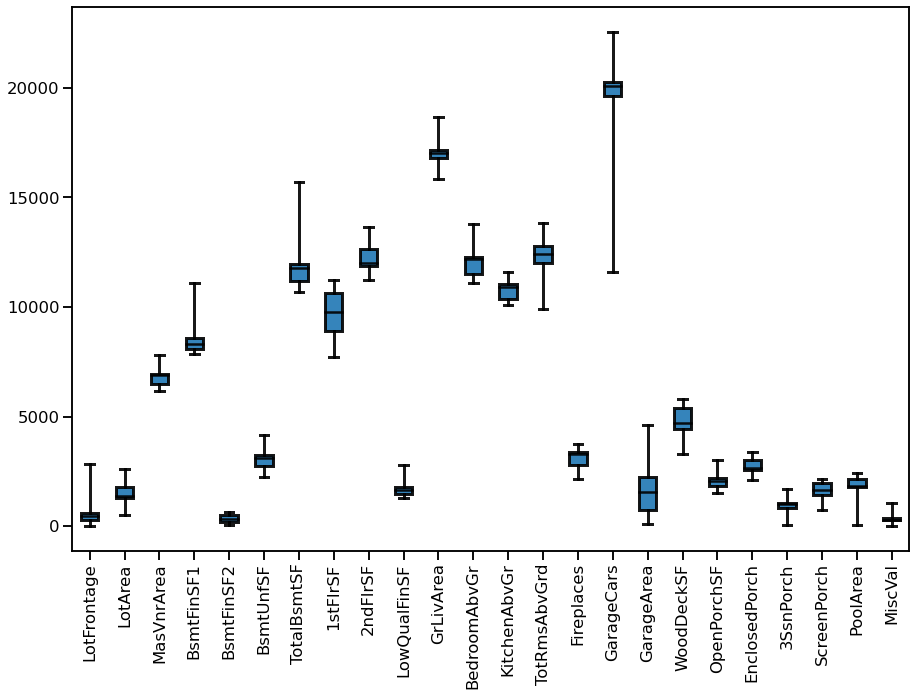

In [12]:
sns.set_context('talk')
# Define the style of the box style
boxplot_property = {
    'vert': True,
    'whis': 100,
    'patch_artist': True,
    'widths': 0.5,
    'rot': 90,
    'boxprops': dict(linewidth=3, color='black', alpha=0.9),
    'medianprops': dict(linewidth=2.5, color='black', alpha=0.9),
    'whiskerprops': dict(linewidth=3, color='black', alpha=0.9),
    'capprops': dict(linewidth=3, color='black', alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = weights_linear_regression.abs().plot.box(**boxplot_property, ax=ax)

What are the two most important features used by the ridge regressor? 

GarageCars and GrLivArea are the two most important features used by the ridge regression.

Remove the feature "GarageArea" from the dataset and repeat the previous experiment.

In [13]:
data_numerical_rm = data_numerical.drop(columns='GarageArea')

In [14]:
data_numerical_rm

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,8,0,2,0,61,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,6,1,2,298,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,6,1,2,0,42,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,7,1,3,0,35,272,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,9,1,3,192,84,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,...,7,1,2,0,40,0,0,0,0,0
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,...,7,2,2,349,0,0,0,0,0,0
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,...,9,2,1,0,60,0,0,0,0,2500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,...,5,0,1,366,0,112,0,0,0,0


In [15]:
numerical_features_rm = numerical_features.remove('GarageArea')

In [16]:
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1))

cv_results = cross_validate(ridge_model,
                            data_numerical_rm, target, 
                            return_estimator=True, cv=10)

In [17]:
coefs = [est[-1].coef_ for est in cv_results['estimator']]
weights_linear_regression = pd.DataFrame(coefs, columns=numerical_features)

In [18]:
weights_linear_regression

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-581.788102,1390.212130,7605.143898,8733.007020,-271.971302,2961.429989,11886.603533,9961.687034,11953.603897,-1583.349456,...,12042.988479,3455.255574,19375.930775,4545.131576,2137.333169,-2135.467975,1718.236988,1694.502562,-2042.516877,353.531993
1,-1141.650319,1112.723707,6559.339448,8473.464671,-61.192680,3113.432434,11889.716290,9774.918842,11817.110744,-2778.365718,...,12779.533592,3391.526736,18455.992304,5389.993644,1615.675431,-3145.473422,880.075992,742.399779,-1799.414985,265.381685
2,-215.943868,472.569716,6808.527960,8442.001034,-657.838705,3256.624603,11819.237883,9285.486652,11958.682803,-1706.283522,...,12818.482757,3422.343218,18775.604732,5539.169578,1770.220707,-2664.030435,1075.498675,1954.448488,-1775.364832,-1074.078351
3,-338.299526,1957.551946,7784.927777,7866.414821,-560.415047,2731.343636,10904.797276,11123.582373,12760.085431,-1841.198148,...,10502.829463,2281.601007,18608.862582,4437.737489,2978.159897,-2793.411959,833.911262,1580.707234,-2196.126500,283.836954
4,464.028010,1379.369064,6155.370286,7875.302568,219.169014,3235.811953,11416.722119,8686.647775,11418.650500,-1907.200625,...,12286.965274,3615.322834,19829.484416,3941.040441,1983.018812,-2461.216282,980.502073,1961.464155,-1606.941192,-2.276242
5,160.368224,1257.726253,6126.242261,8476.649019,-194.032556,2270.441408,10983.031109,10665.238065,12277.348797,-1521.158506,...,10037.220929,3625.080080,19963.351138,4806.370026,1988.218168,-2578.329923,1057.230371,1353.695788,-2298.597947,242.683367
6,-550.908326,1806.022932,6933.780422,8083.088578,364.283906,3645.473667,12167.202974,8677.861044,12779.462365,-1446.322120,...,12118.590717,3122.771144,19367.131900,5785.339784,2511.087801,-2596.285597,1549.071021,1956.379891,-1816.026405,242.654240
7,-665.995214,1321.183044,6939.743171,8055.870947,-416.751629,2415.272182,10654.884244,10779.337014,11235.731784,-1282.807241,...,12520.448896,3803.488159,19515.985784,5397.364228,2043.916326,-3403.482187,1058.665438,1610.759317,-1892.048672,307.538072
8,3050.032793,2616.701180,6593.598397,11242.508045,-595.426582,4125.676888,15799.183845,7995.512456,13640.660824,-1668.003969,...,12841.051013,1948.754914,15404.159197,3299.396352,2205.759919,-3026.555006,23.532153,1271.649703,57.255505,654.503711
9,15.293672,1675.615426,6943.163583,8130.424649,198.683125,3134.223729,11685.645057,9571.685469,12096.835697,-1483.397346,...,13816.022945,2675.846503,19079.743564,4446.232977,1491.390358,-2664.092949,293.774892,2172.345807,-2421.570766,101.278466


In [19]:
weights_linear_regression.describe().loc[['min', 'max']]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-1141.650319,472.569716,6126.242261,7866.414821,-657.838705,2270.441408,10654.884244,7995.512456,11235.731784,-2778.365718,...,10037.220929,1948.754914,15404.159197,3299.396352,1491.390358,-3403.482187,23.532153,742.399779,-2421.570766,-1074.078351
max,3050.032793,2616.701180,7784.927777,11242.508045,364.283906,4125.676888,15799.183845,11123.582373,13640.660824,-1282.807241,...,13816.022945,3803.488159,19963.351138,5785.339784,2978.159897,-2135.467975,1718.236988,2172.345807,57.255505,654.503711


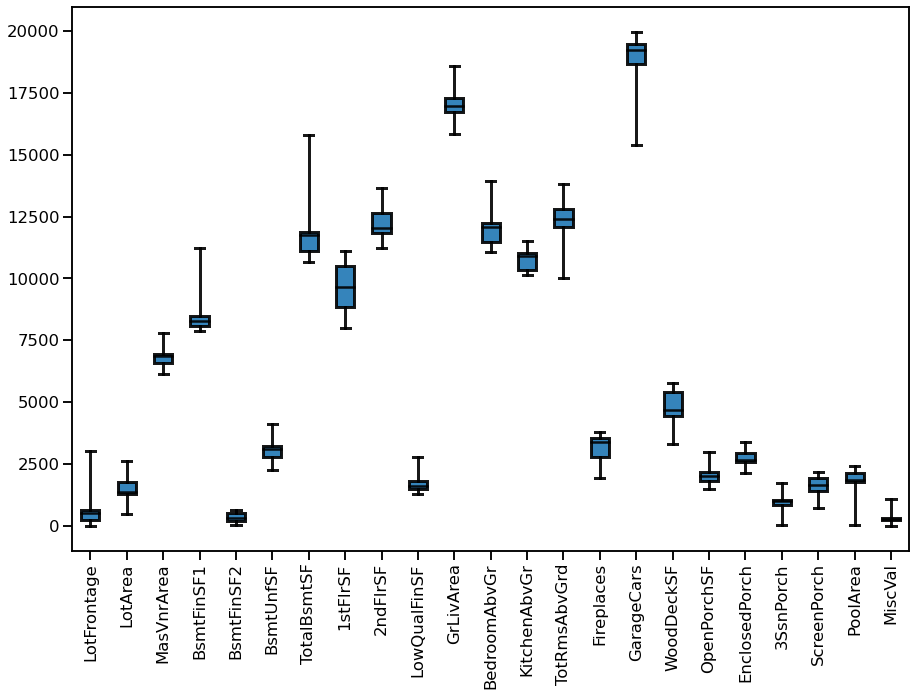

In [20]:
sns.set_context('talk')
# Define the style of the box style
boxplot_property = {
    'vert': True,
    'whis': 100,
    'patch_artist': True,
    'widths': 0.5,
    'rot': 90,
    'boxprops': dict(linewidth=3, color='black', alpha=0.9),
    'medianprops': dict(linewidth=2.5, color='black', alpha=0.9),
    'whiskerprops': dict(linewidth=3, color='black', alpha=0.9),
    'capprops': dict(linewidth=3, color='black', alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = weights_linear_regression.abs().plot.box(**boxplot_property, ax=ax)

In [21]:
data_numerical[['GarageArea', 'GarageCars']].corr()

,GarageArea,GarageCars
GarageArea,1.000000,0.882475
GarageCars,0.882475,1.000000


Correlated features typically cause unstable estimation of the the matching linear model coefficients, even with some level of regularization. As a result we can expect comparatively larger standard deviations of their coefficients when the two correlated features are included in the linear model.

Now, we will search for the regularization strength that maximizes the generalization performance of our predictive model. Fit a sklearn.linear_model.RidgeCV instead of a Ridge regressor on the numerical data without the "GarageArea" column. Pass alphas=np.logspace(-3, 3, num=101) to explore the effect of changing the regularization strength.

What is the effect of tuning alpha on the variability of the weights of the feature "GarageCars"? Remember that the variability can be assessed by computing the standard deviation.

In [22]:
weights_linear_regression['GarageCars'].std()

1305.139394188659

In [23]:
from sklearn.linear_model import RidgeCV
import numpy as np

alphas = np.logspace(-3, 3, num=101)
ridge_model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))

cv_results = cross_validate(ridge_model,
                            data_numerical_rm, target, 
                            return_estimator=True, cv=10)

In [24]:
coefs = [est[-1].coef_ for est in cv_results['estimator']]
weights_linear_regression = pd.DataFrame(coefs, columns=numerical_features)

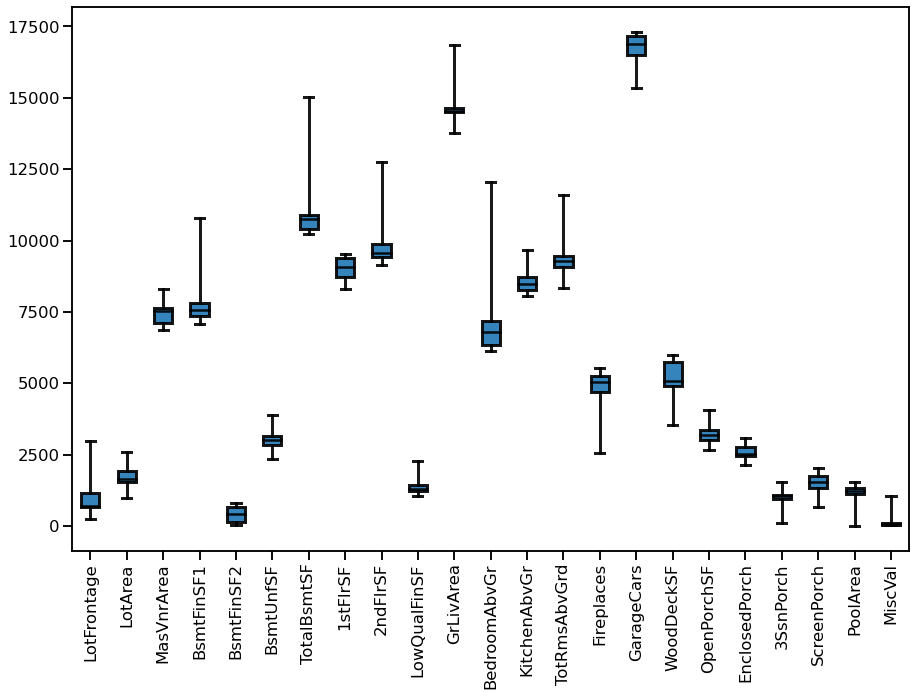

In [25]:
sns.set_context('talk')
# Define the style of the box style
boxplot_property = {
    'vert': True,
    'whis': 100,
    'patch_artist': True,
    'widths': 0.5,
    'rot': 90,
    'boxprops': dict(linewidth=3, color='black', alpha=0.9),
    'medianprops': dict(linewidth=2.5, color='black', alpha=0.9),
    'whiskerprops': dict(linewidth=3, color='black', alpha=0.9),
    'capprops': dict(linewidth=3, color='black', alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = weights_linear_regression.abs().plot.box(**boxplot_property, ax=ax)

In [26]:
weights_linear_regression['GarageCars'].std()

587.5476658334958

Check the parameter alpha_ (the regularization strength) for the different ridge regressors obtained on each fold.

In [27]:
for i in range(10):
    print(cv_results['estimator'][i]['ridgecv'].alpha_)

331.13112148259074
331.13112148259074
288.40315031266056
331.13112148259074
331.13112148259074
331.13112148259074
288.40315031266056
331.13112148259074
63.0957344480193
331.13112148259074


In [28]:
tuned_alphas = [pipeline[-1].alpha_ for pipeline in cv_results['estimator']]
tuned_alphas

[331.13112148259074,
 331.13112148259074,
 288.40315031266056,
 331.13112148259074,
 331.13112148259074,
 331.13112148259074,
 288.40315031266056,
 331.13112148259074,
 63.0957344480193,
 331.13112148259074]

Now, we will tackle a classification problem instead of a regression problem. Load the Adult Census dataset with the following snippet of code and we will work only with numerical features.

In [29]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

In [30]:
data

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30
...,...,...,...,...
48837,27,0,0,38
48838,40,0,0,40
48839,58,0,0,40
48840,22,0,0,20


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   capital-gain    48842 non-null  int64
 2   capital-loss    48842 non-null  int64
 3   hours-per-week  48842 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


Compare the generalization performance using the accuracy of the two following predictive models using a 10-fold cross-validation:

a linear model composed of a StandardScaler and a LogisticRegression
a DummyClassifier predicting the most frequent class
By comparing the cross-validation test scores of both models fold-to-fold, count the number of times the linear model has a better test score than the dummy classifier.

In [32]:
from sklearn.dummy import DummyClassifier

model = DummyClassifier(strategy='most_frequent')
cv_results = cross_validate(model, data, target, cv=10, scoring='accuracy')


In [33]:
cv_results['test_score']

array([0.76069601, 0.76069601, 0.76085176, 0.76085176, 0.76085176,
       0.76064701, 0.76064701, 0.76064701, 0.76064701, 0.76064701])

In [34]:
from sklearn.linear_model import LogisticRegression

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_results = cross_validate(model, data, target, 
                            return_estimator=True, cv=10, scoring='accuracy')

In [35]:
cv_results['test_score']

array([0.79856704, 0.79283521, 0.79668305, 0.80487305, 0.80036855,
       0.79914005, 0.79750205, 0.7993448 , 0.80507781, 0.80405405])

What is the most important feature seen by the logistic regression?

In [36]:
cols = data.columns.to_list()

In [37]:
cols

['age', 'capital-gain', 'capital-loss', 'hours-per-week']

<AxesSubplot:>

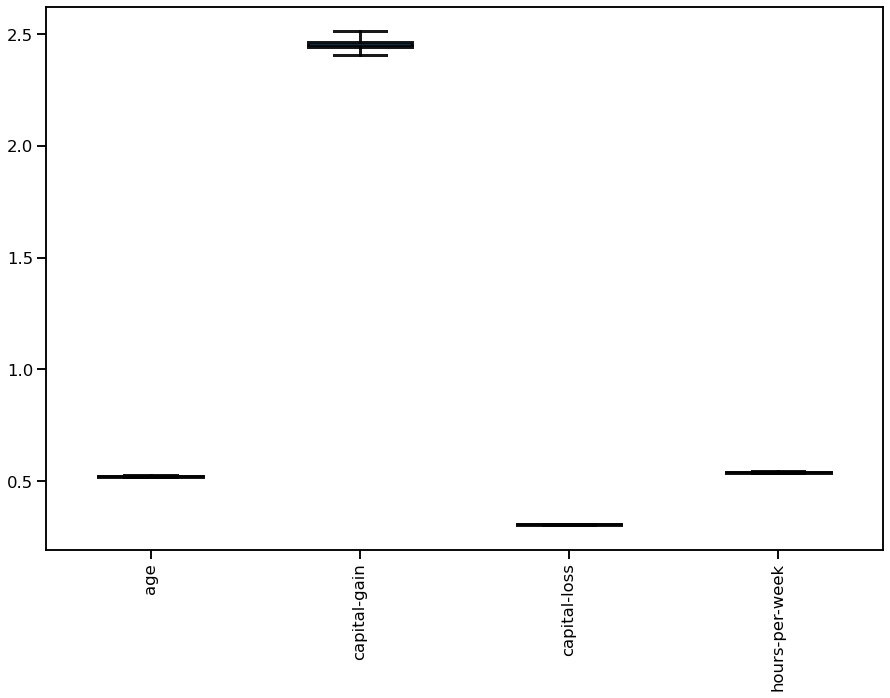

In [38]:
coefs = [pipeline[-1].coef_[0] for pipeline in cv_results['estimator']]
coefs = pd.DataFrame(coefs, columns=cols)
_, ax = plt.subplots(figsize=(15, 10))
coefs.abs().plot.box(**boxplot_property, ax=ax)

The most important feature is 'capital-gain'.

Now, we will work with both numerical and categorical features. You can load Adult Census with the following snippet:

In [39]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [40]:
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [41]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = selector(dtype_include=object)(data)
numerical_columns = selector(dtype_exclude=object)(data)

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    (StandardScaler(), numerical_columns),
)
model = make_pipeline(preprocessor, LogisticRegression(max_iter=5000))
cv_results = cross_validate(
    model, data, target, cv=10, return_estimator=True, n_jobs=2
)
test_score_complex_lr = cv_results["test_score"]
test_score_complex_lr

array([0.85261003, 0.85076766, 0.85012285, 0.84889435, 0.84889435,
       0.8466421 , 0.8548321 , 0.8511466 , 0.85872236, 0.85257985])

In [42]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["onehotencoder"]
                             .get_feature_names_out(categorical_columns)).tolist()
feature_names += numerical_columns
feature_names

['workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Fa

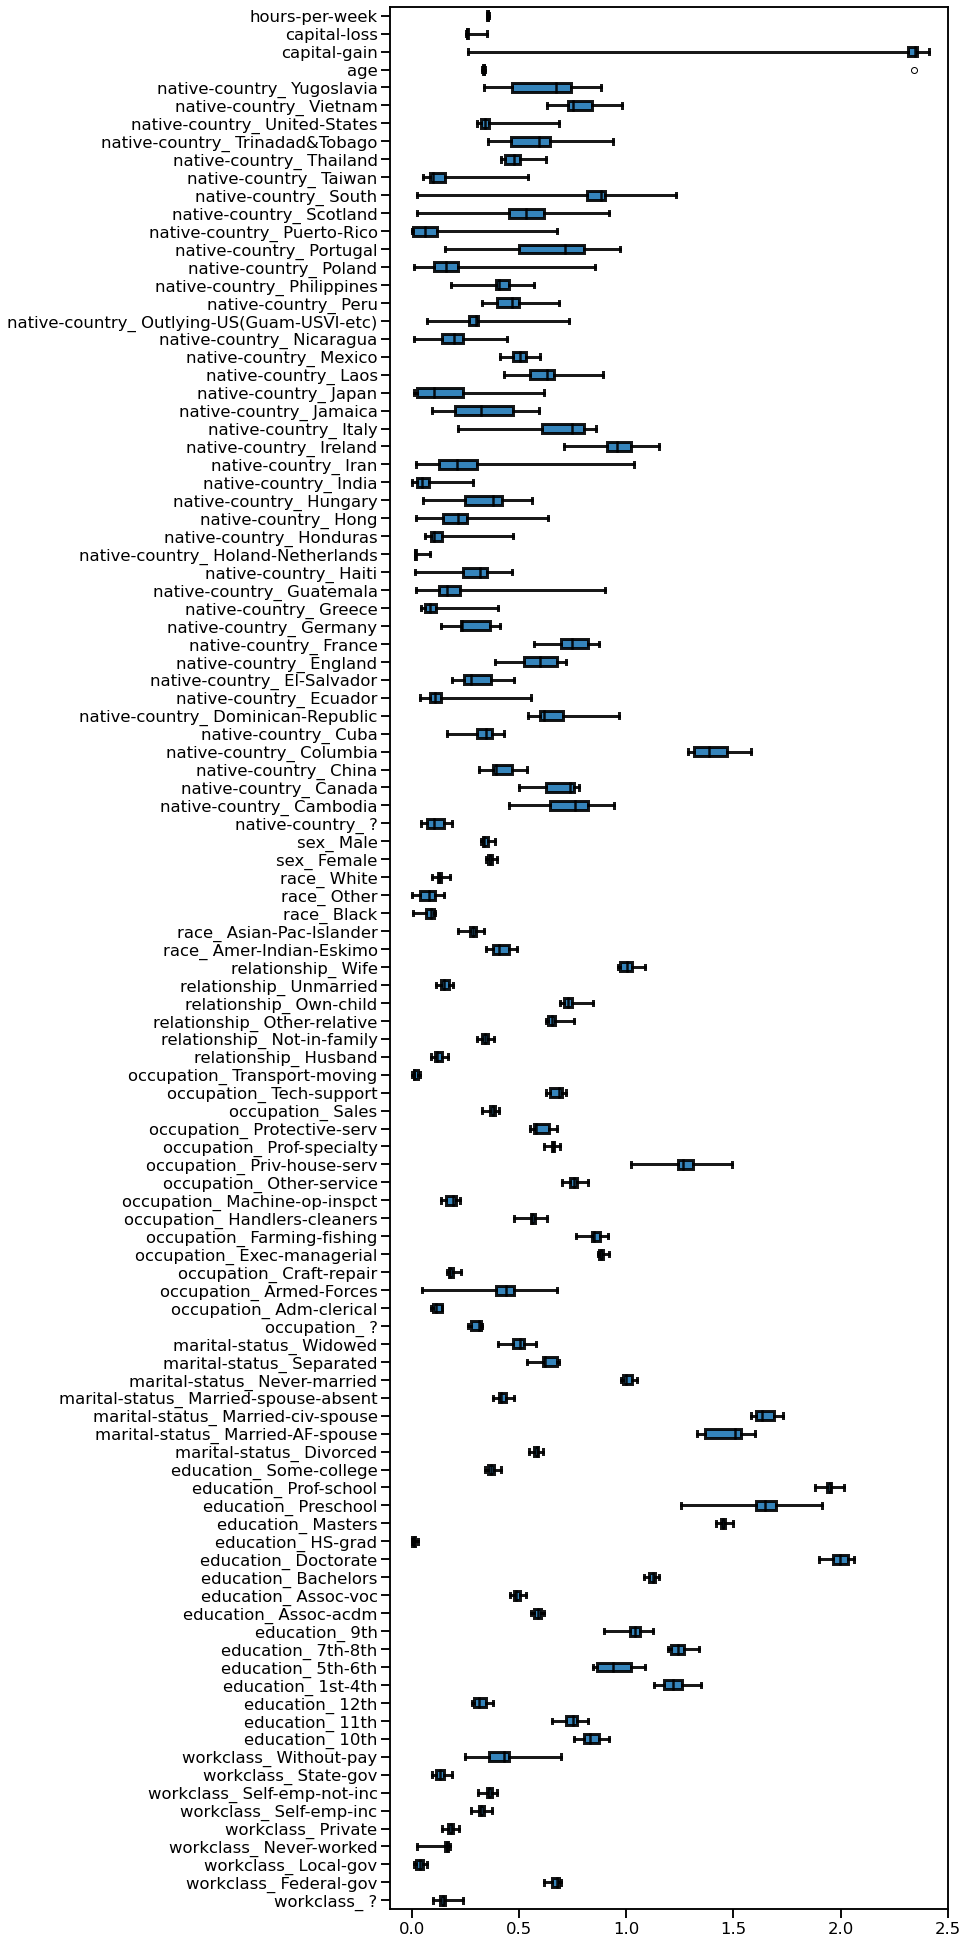

In [43]:
coefs = [pipeline[-1].coef_[0] for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)

# Define the style of the box style
boxplot_property = {
    "vert": False,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(10, 35))
ax.set(xlim=(-0.1, 2.5))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)